# 2. Scene inspection

## Overview

This tutorial explores an important mechanism in Mitsuba 2: `traverse()`.

<div class="alert alert-block alert-info">

✔️ **What will you learn?**
    
<ul>
  <li>Use the traverse mechanism to inspect and edit a scene</li>
  <li>Convert Bitmap images to numpy array</li>
</ul>
    
</div>


### Step 1 - set things up

Following the same steps as in [Tutorial 1](../01_first_render), we are going to import mitsuba and load a scene from an XML file on disk.

In [1]:
# Add mitsuba and enoki to PATH (this shouldn't be necessary)
import sys
sys.path.append('/home/speierers/projects/mitsuba2-symbolic/build/python')

In [2]:
import enoki as ek 
import mitsuba
mitsuba.set_variant('llvm_ad_rgb')

from mitsuba.core.xml import load_file
scene = load_file('../../resources/data/scenes/hello.xml')

2021-04-20 16:16:43 INFO main [xml.cpp:1239] Loading XML file "../../resources/data/scenes/hello.xml" ..

2021-04-20 16:16:43 INFO main [xml.cpp:1240] Using variant "llvm_ad_rgb"

2021-04-20 16:16:43 INFO main [Scene] Embree ready. (took 33ms)

### Step 2 - access the scene parameters

In [3]:
from mitsuba.python.util import traverse
params = traverse(scene)

In [4]:
print(params)

SceneParameters[
    PerspectiveCamera.near_clip,
    PerspectiveCamera.far_clip,
    PerspectiveCamera.focus_distance,
    PerspectiveCamera.shutter_open,
    PerspectiveCamera.shutter_open_time,
    PerspectiveCamera.x_fov,
    PLYMesh.to_world,
  * PLYMesh.bsdf.reflectance.value,
    PLYMesh.vertex_count,
    PLYMesh.face_count,
    PLYMesh.faces,
  * PLYMesh.vertex_positions,
  * PLYMesh.vertex_normals,
  * PLYMesh.vertex_texcoords,
  * PointLight.intensity.value,
  * PointLight_1.intensity.value,
]


Before making any modifications to the scene, let's render the scene as it is.

In [5]:
from mitsuba.python.util import render
image1 = render(scene)

2021-04-20 16:16:44 INFO main [SamplingIntegrator] Start rendering...

2021-04-20 16:16:44 INFO main [SamplingIntegrator] Computation graph recorded. (took 13ms)

2021-04-20 16:16:44 INFO main [SamplingIntegrator] Code generation finished. (took 3ms)

2021-04-20 16:16:44 INFO main [SamplingIntegrator] Rendering finished. (took 72ms)

### Step 3 - edit the scene

In [15]:
# Give a red-ish tint to the first point light source
params['PointLight.intensity.value'] *= [1.5, 0.2, 0.2]

# Give a green-ish tint to the second point light source
params['PointLight_1.intensity.value'] *= [0.2, 1.5, 0.2]

# Notify the scene of the changes
params.update()

# Render the modified scene
image2 = render(scene)

2021-04-20 16:22:15 INFO main [SamplingIntegrator] Start rendering...

2021-04-20 16:22:15 INFO main [SamplingIntegrator] Computation graph recorded. (took 3ms)

2021-04-20 16:22:15 INFO main [SamplingIntegrator] Code generation finished. (took 62ms)

2021-04-20 16:22:15 INFO main [SamplingIntegrator] Rendering finished. (took 117ms)

### Step 4 - display the images

In [14]:
import numpy as np
image1_np = np.array(image1)
image2_np = np.array(image2)

We can now easily display the render images using matplotlib without having to write the images to disk.

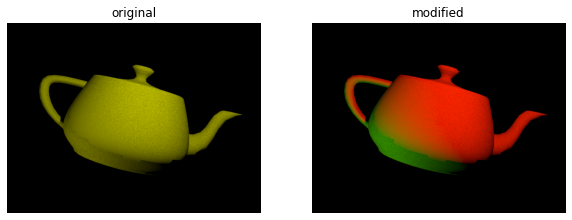

In [13]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1,2,1).imshow(image1_np); plt.axis('off'); plt.title('original')
fig.add_subplot(1,2,2).imshow(image2_np); plt.axis('off'); plt.title('modified');

### *Reference API*

- [<code>mitsuba.python.util.traverse</code>](...)
- [<code>mitsuba.python.util.render</code>](...)
- [<code>mitsuba.python.util.SceneParameters.update</code>](...)